In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_train = pd.read_csv("data/smoker_train.csv")
# df_train = df_train.drop_duplicates()

cardinal_features = [
    "waist(cm)",
    "age",
    "height(cm)",
    "weight(kg)",
    "smoking",
    "systolic",
    "relaxation",
    "eyesight(left)",
    "eyesight(right)",
    "Cholesterol",
    "triglyceride",
    "HDL",
    "LDL",
    "AST",
    "ALT",
    "Gtp",
    "fasting blood sugar",
    "hemoglobin",
    "serum creatinine",
]

ordinal_features = [
    "Urine protein" # 1, 2, 3, 4, 5, 6
]

nominal_features = [
    "hearing(left)",    # 1 and 2
    "hearing(right)",   # 1 and 2
    "dental caries"     # 0 and 1
]


# New Correlation Analysis

In [4]:
from scipy.stats import chi2_contingency, spearmanr, pearsonr
from itertools import combinations
import warnings
warnings.filterwarnings('ignore')

# Datenübersicht
print("Datensatz Shape:", df_train.shape)
print("\nErste 5 Zeilen:")
print(df_train.head())
print("\nFehlende Werte:")
print(df_train.isnull().sum().sum())
print("\nGrundlegende Statistiken:")
print(df_train.describe())

Datensatz Shape: (38984, 23)

Erste 5 Zeilen:
   age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  eyesight(right)  \
0   35         170          85       97.0             0.9              0.9   
1   20         175         110      110.0             0.7              0.9   
2   45         155          65       86.0             0.9              0.9   
3   45         165          80       94.0             0.8              0.7   
4   20         165          60       81.0             1.5              0.1   

   hearing(left)  hearing(right)  systolic  relaxation  ...  HDL  LDL  \
0              1               1       118          78  ...   70  142   
1              1               1       119          79  ...   71  114   
2              1               1       110          80  ...   57  112   
3              1               1       158          88  ...   46   91   
4              1               1       109          64  ...   47   92   

   hemoglobin  Urine protein  serum creatinine

KORRELATIONSANALYSE - KARDINALE MERKMALE


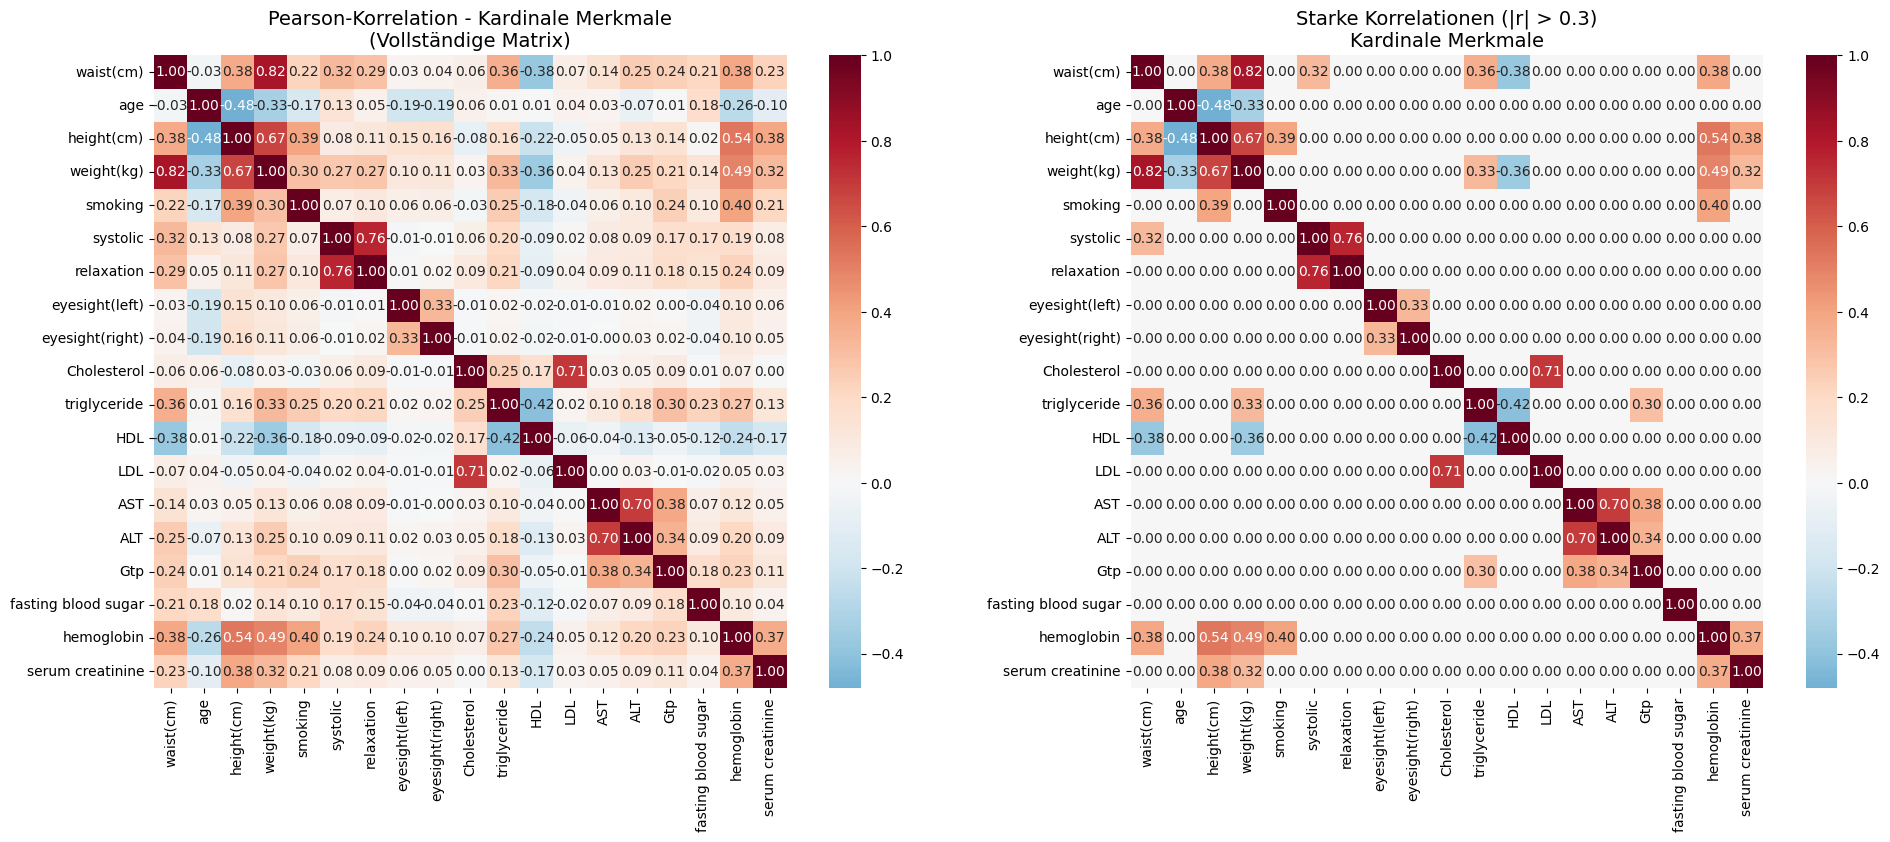


Stärkste Korrelationen (|r| > 0.5):
waist(cm) <-> weight(kg): r = 0.825
systolic <-> relaxation: r = 0.759
Cholesterol <-> LDL: r = 0.707
AST <-> ALT: r = 0.697
height(cm) <-> weight(kg): r = 0.674
height(cm) <-> hemoglobin: r = 0.537

Anzahl starker Korrelationen: 6


In [5]:
# Korrelationsanalyse für kardinale Merkmale
print("="*50)
print("KORRELATIONSANALYSE - KARDINALE MERKMALE")
print("="*50)

# Kardinale Merkmale für Korrelationsanalyse
df_cardinal = df_train[cardinal_features]

# Pearson-Korrelation berechnen
corr_pearson = df_cardinal.corr(method='pearson')

# Visualisierung der Korrelationsmatrix
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Vollständige Korrelationsmatrix
sns.heatmap(corr_pearson, annot=True, cmap='RdBu_r', center=0, 
            fmt='.2f', square=True, ax=axes[0])
axes[0].set_title('Pearson-Korrelation - Kardinale Merkmale\n(Vollständige Matrix)', fontsize=14)

# Nur starke Korrelationen (|r| > 0.3)
mask = np.abs(corr_pearson) < 0.3
corr_strong = corr_pearson.copy()
corr_strong[mask] = 0

sns.heatmap(corr_strong, annot=True, cmap='RdBu_r', center=0, 
            fmt='.2f', square=True, ax=axes[1])
axes[1].set_title('Starke Korrelationen (|r| > 0.3)\nKardinale Merkmale', fontsize=14)

plt.tight_layout()
plt.show()

# Identifikation der stärksten Korrelationen
print("\nStärkste Korrelationen (|r| > 0.5):")
upper_triangle = corr_pearson.where(np.triu(np.ones(corr_pearson.shape), k=1).astype(bool))
strong_correlations = []

for col in upper_triangle.columns:
    for idx in upper_triangle.index:
        value = upper_triangle.loc[idx, col]
        if not pd.isna(value) and abs(value) > 0.5:
            strong_correlations.append((idx, col, value))

strong_correlations.sort(key=lambda x: abs(x[2]), reverse=True)

for var1, var2, corr_val in strong_correlations:
    print(f"{var1} <-> {var2}: r = {corr_val:.3f}")

print(f"\nAnzahl starker Korrelationen: {len(strong_correlations)}")


DETAILANALYSE DER STÄRKSTEN KORRELATIONEN


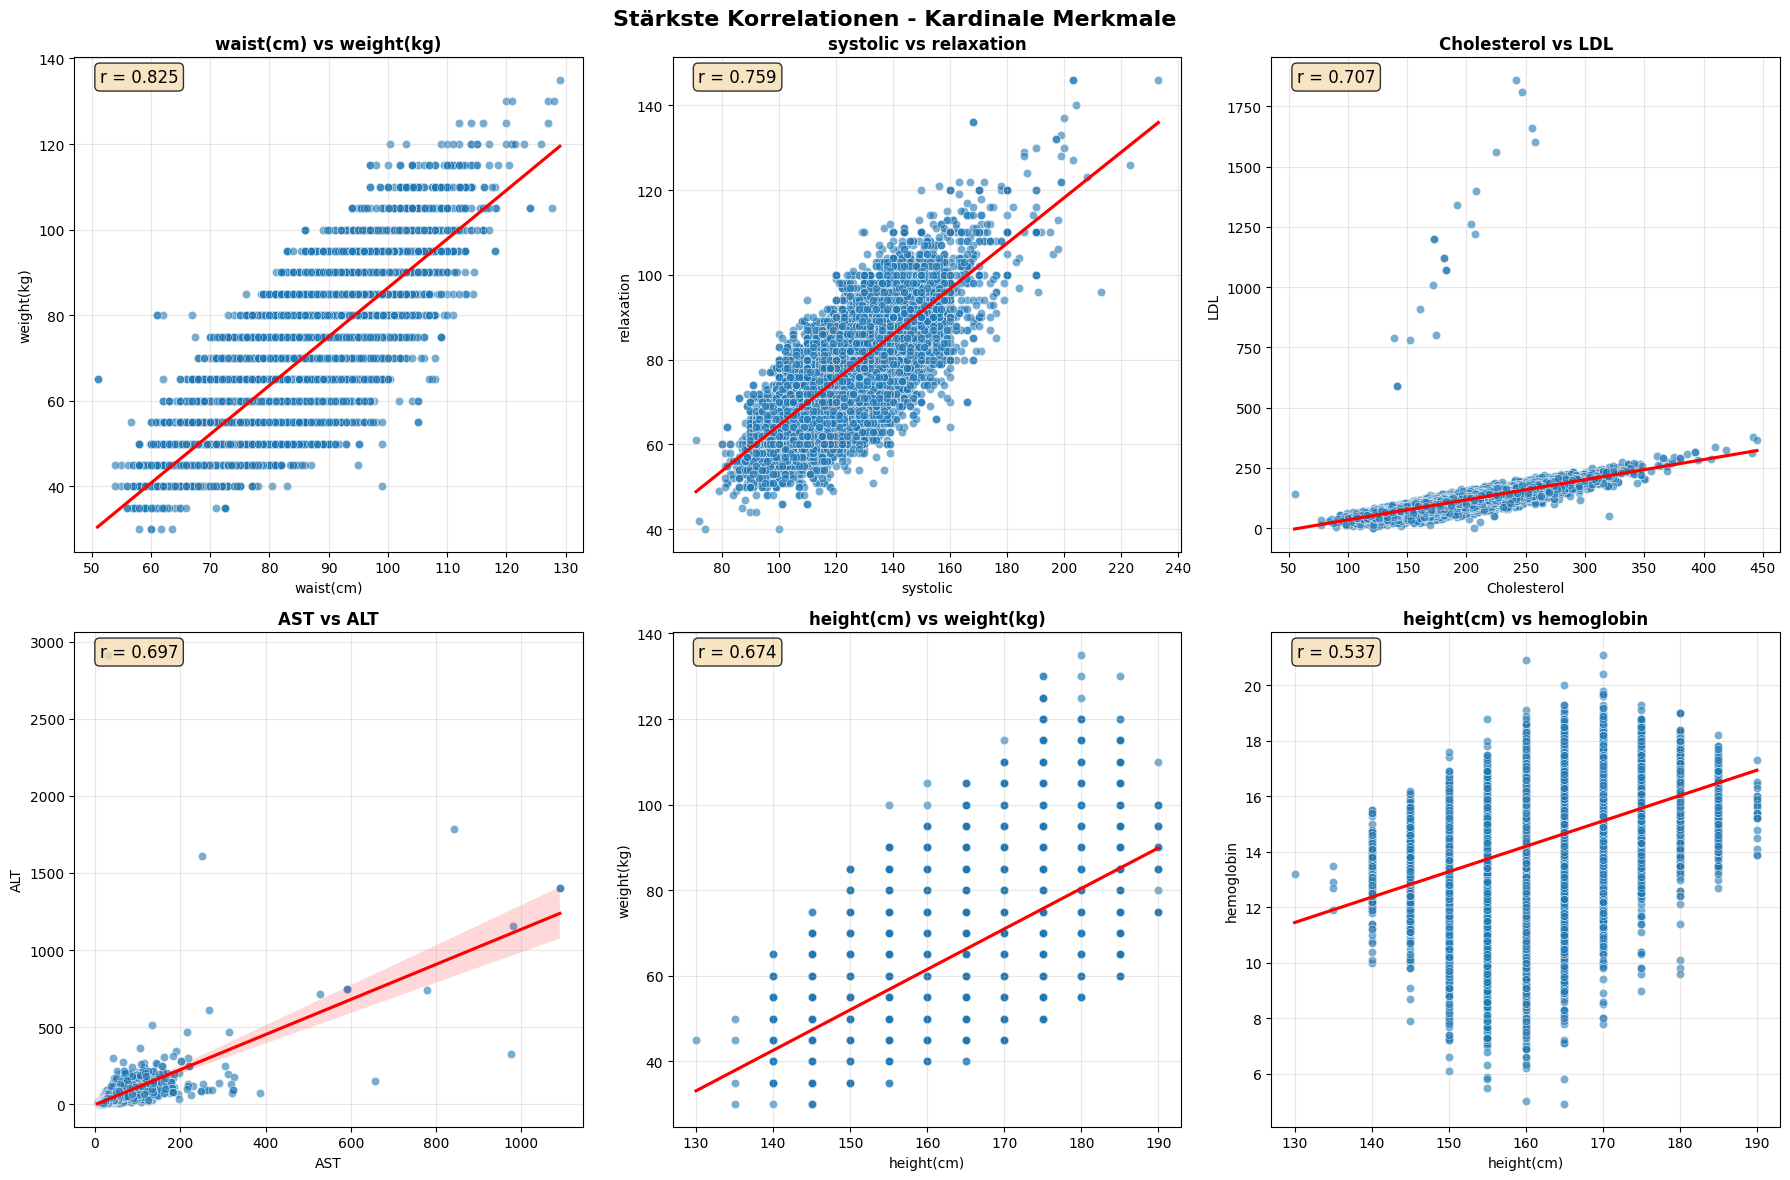


KORRELATION MIT ZIELVARIABLE 'SMOKING'
Korrelationen mit 'smoking' (sortiert nach Stärke):
hemoglobin: r = 0.401
height(cm): r = 0.394
weight(kg): r = 0.299
triglyceride: r = 0.251
Gtp: r = 0.240
waist(cm): r = 0.223
serum creatinine: r = 0.212
HDL: r = -0.180
age: r = -0.166
relaxation: r = 0.104
fasting blood sugar: r = 0.100
ALT: r = 0.099
systolic: r = 0.070
eyesight(right): r = 0.065
AST: r = 0.063
eyesight(left): r = 0.059
LDL: r = -0.042
Cholesterol: r = -0.027


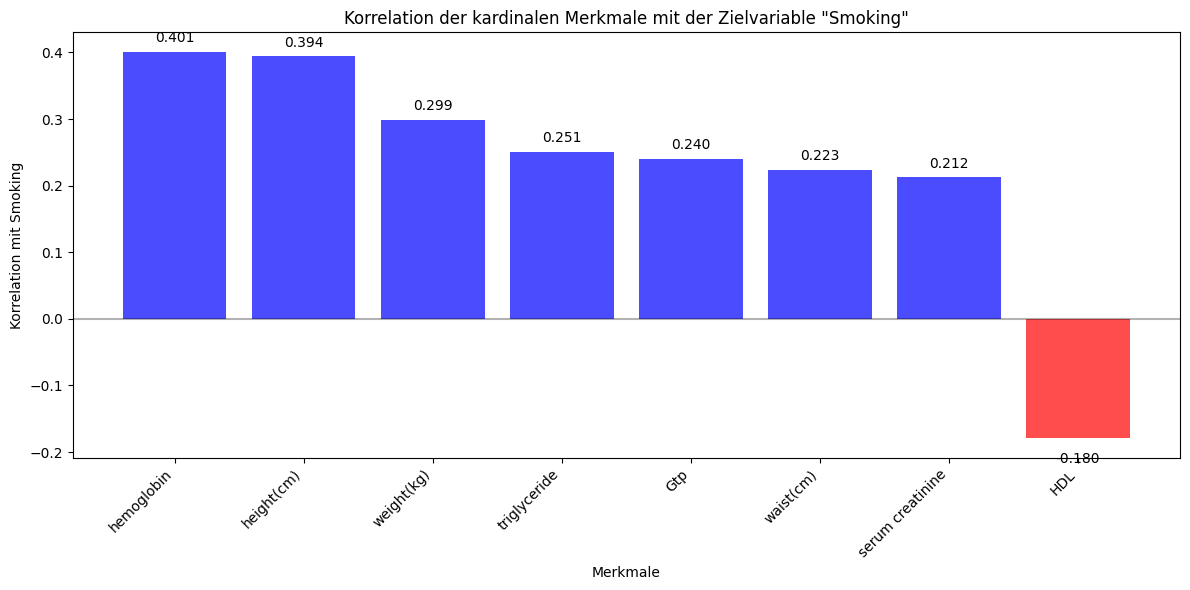

In [6]:
# Detaillierte Visualisierung der stärksten Korrelationen
print("\n" + "="*60)
print("DETAILANALYSE DER STÄRKSTEN KORRELATIONEN")
print("="*60)

# Top 6 Korrelationen visualisieren
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

correlations_to_plot = [
    ('waist(cm)', 'weight(kg)', 0.825),
    ('systolic', 'relaxation', 0.759),
    ('Cholesterol', 'LDL', 0.707),
    ('AST', 'ALT', 0.697),
    ('height(cm)', 'weight(kg)', 0.674),
    ('height(cm)', 'hemoglobin', 0.537)
]

for i, (var1, var2, corr) in enumerate(correlations_to_plot):
    # Scatterplot mit Regressionslinie
    sns.scatterplot(data=df_train, x=var1, y=var2, alpha=0.6, ax=axes[i])
    sns.regplot(data=df_train, x=var1, y=var2, scatter=False, 
                color='red', ax=axes[i])
    
    # Korrelationskoeffizient als Text hinzufügen
    axes[i].text(0.05, 0.95, f'r = {corr:.3f}', 
                transform=axes[i].transAxes, fontsize=12, 
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    axes[i].set_title(f'{var1} vs {var2}', fontsize=12, fontweight='bold')
    axes[i].grid(True, alpha=0.3)

plt.suptitle('Stärkste Korrelationen - Kardinale Merkmale', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Korrelation mit Zielvariable "smoking"
print("\n" + "="*40)
print("KORRELATION MIT ZIELVARIABLE 'SMOKING'")
print("="*40)

smoking_correlations = []
for feature in cardinal_features:
    if feature != 'smoking':
        corr_val = df_train[feature].corr(df_train['smoking'])
        smoking_correlations.append((feature, corr_val))

smoking_correlations.sort(key=lambda x: abs(x[1]), reverse=True)

print("Korrelationen mit 'smoking' (sortiert nach Stärke):")
for feature, corr in smoking_correlations:
    print(f"{feature}: r = {corr:.3f}")

# Visualisierung der Korrelationen mit smoking
features_for_smoking = [item[0] for item in smoking_correlations[:8]]  # Top 8
corr_values = [item[1] for item in smoking_correlations[:8]]

plt.figure(figsize=(12, 6))
colors = ['red' if x < 0 else 'blue' for x in corr_values]
bars = plt.bar(range(len(features_for_smoking)), corr_values, color=colors, alpha=0.7)

plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.xlabel('Merkmale')
plt.ylabel('Korrelation mit Smoking')
plt.title('Korrelation der kardinalen Merkmale mit der Zielvariable "Smoking"')
plt.xticks(range(len(features_for_smoking)), features_for_smoking, rotation=45, ha='right')

# Werte auf Balken anzeigen
for bar, value in zip(bars, corr_values):
    plt.text(bar.get_x() + bar.get_width()/2, 
             bar.get_height() + (0.01 if value > 0 else -0.02), 
             f'{value:.3f}', ha='center', va='bottom' if value > 0 else 'top')

plt.tight_layout()
plt.show()


SPEARMAN-KORRELATIONSANALYSE - ORDINALE MERKMALE


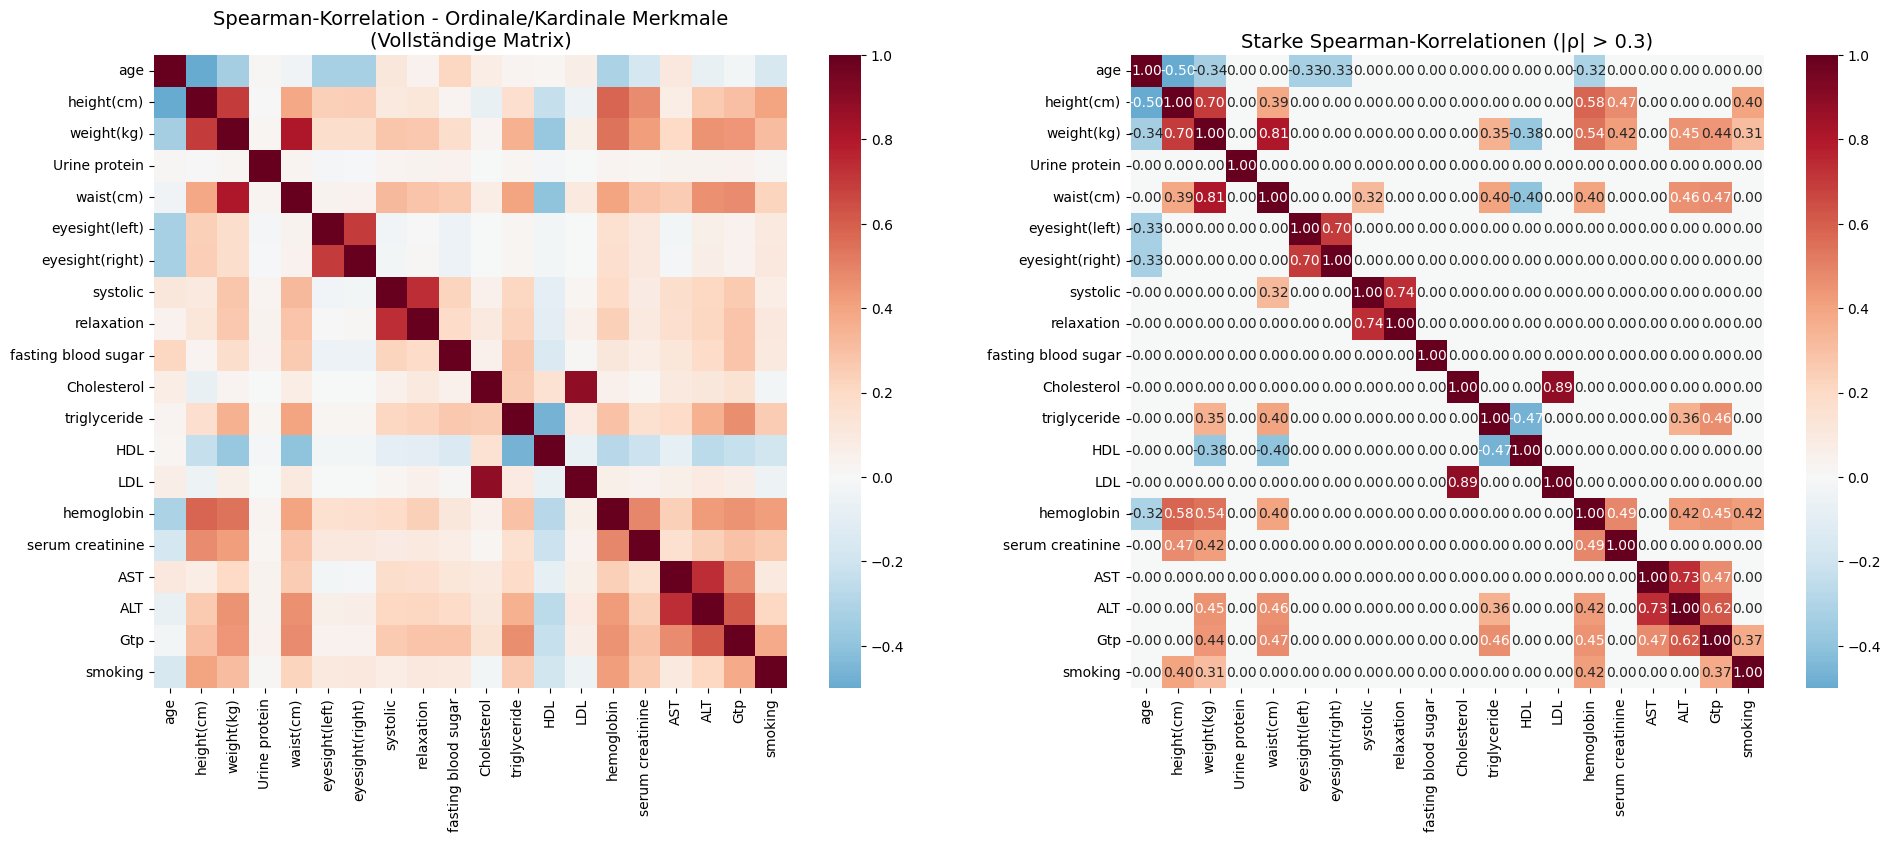


VERGLEICH: PEARSON vs. SPEARMAN KORRELATION
Durchschnittliche absolute Differenz zwischen Pearson und Spearman: 0.0496
Maximale absolute Differenz: 0.3619

Größte Unterschiede zwischen Pearson und Spearman (Δ > 0.05):
eyesight(left) <-> eyesight(right): Pearson=0.335, Spearman=0.697, Δ=0.362
ALT <-> Gtp: Pearson=0.341, Spearman=0.623, Δ=0.281
weight(kg) <-> Gtp: Pearson=0.210, Spearman=0.440, Δ=0.230
waist(cm) <-> Gtp: Pearson=0.241, Spearman=0.468, Δ=0.227
Gtp <-> hemoglobin: Pearson=0.226, Spearman=0.449, Δ=0.223
ALT <-> hemoglobin: Pearson=0.202, Spearman=0.420, Δ=0.218
waist(cm) <-> ALT: Pearson=0.254, Spearman=0.459, Δ=0.206
weight(kg) <-> ALT: Pearson=0.255, Spearman=0.451, Δ=0.196
Cholesterol <-> LDL: Pearson=0.707, Spearman=0.888, Δ=0.181
triglyceride <-> ALT: Pearson=0.177, Spearman=0.357, Δ=0.180


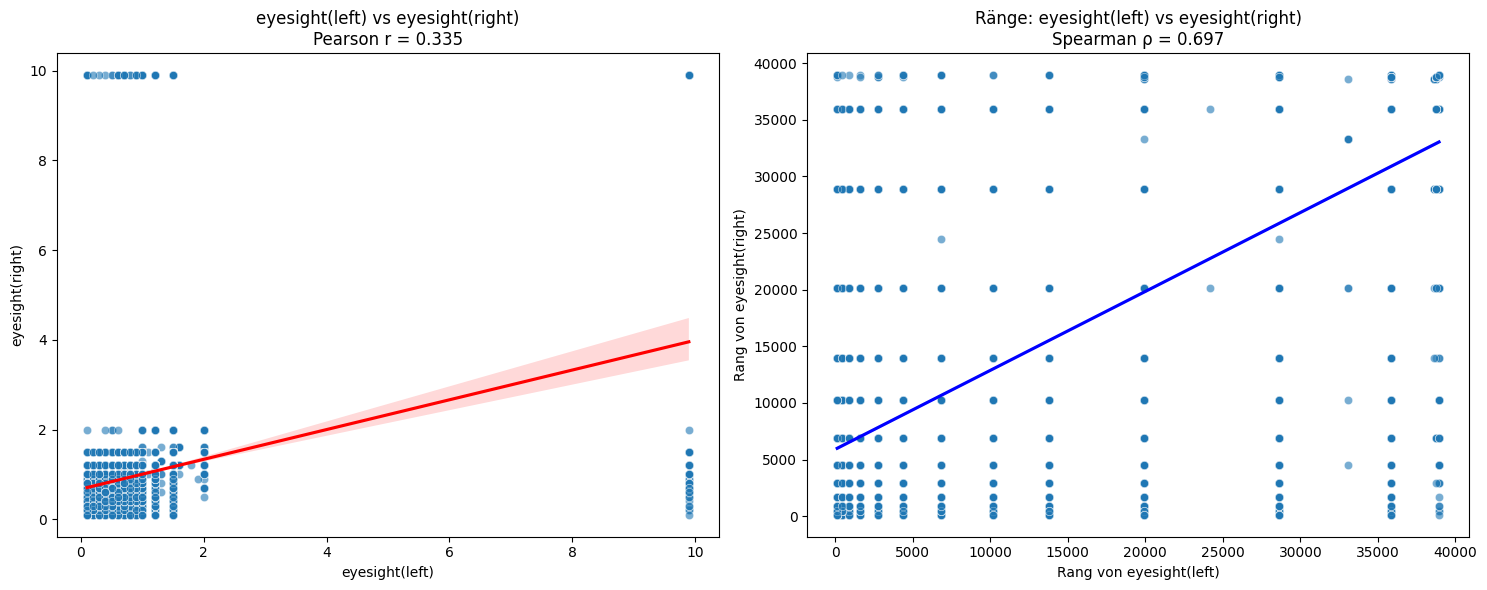

In [7]:
# Spearman-Korrelationsanalyse für ordinale Merkmale
print("\n" + "="*50)
print("SPEARMAN-KORRELATIONSANALYSE - ORDINALE MERKMALE")
print("="*50)

# Ordinale Merkmale erweitert um relevante kardinale Merkmale
ordinal_extended_features = [
    "age", "height(cm)", "weight(kg)", "Urine protein", "waist(cm)",
    "eyesight(left)", "eyesight(right)", "systolic", "relaxation",
    "fasting blood sugar", "Cholesterol", "triglyceride", "HDL", "LDL",
    "hemoglobin", "serum creatinine", "AST", "ALT", "Gtp", "smoking"
]

df_ordinal_extended = df_train[ordinal_extended_features]

# Spearman-Korrelation berechnen
corr_spearman = df_ordinal_extended.corr(method='spearman')

# Visualisierung
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Vollständige Spearman-Korrelationsmatrix
sns.heatmap(corr_spearman, annot=False, cmap='RdBu_r', center=0, 
            fmt='.2f', square=True, ax=axes[0])
axes[0].set_title('Spearman-Korrelation - Ordinale/Kardinale Merkmale\n(Vollständige Matrix)', fontsize=14)

# Nur starke Spearman-Korrelationen (|ρ| > 0.3)
mask_spearman = np.abs(corr_spearman) < 0.3
corr_spearman_strong = corr_spearman.copy()
corr_spearman_strong[mask_spearman] = 0

sns.heatmap(corr_spearman_strong, annot=True, cmap='RdBu_r', center=0, 
            fmt='.2f', square=True, ax=axes[1])
axes[1].set_title('Starke Spearman-Korrelationen (|ρ| > 0.3)', fontsize=14)

plt.tight_layout()
plt.show()

# Vergleich Pearson vs. Spearman für kardinale Merkmale
print("\n" + "="*50)
print("VERGLEICH: PEARSON vs. SPEARMAN KORRELATION")
print("="*50)

# Gemeinsame kardinale Merkmale
common_features = [f for f in cardinal_features if f in ordinal_extended_features]
df_comparison = df_train[common_features]

corr_pearson_comp = df_comparison.corr(method='pearson')
corr_spearman_comp = df_comparison.corr(method='spearman')

# Differenz berechnen
corr_diff = np.abs(corr_pearson_comp - corr_spearman_comp)

print(f"Durchschnittliche absolute Differenz zwischen Pearson und Spearman: {corr_diff.mean().mean():.4f}")
print(f"Maximale absolute Differenz: {corr_diff.max().max():.4f}")

# Größte Unterschiede identifizieren
upper_triangle_diff = corr_diff.where(np.triu(np.ones(corr_diff.shape), k=1).astype(bool))
large_diffs = []

for col in upper_triangle_diff.columns:
    for idx in upper_triangle_diff.index:
        value = upper_triangle_diff.loc[idx, col]
        if not pd.isna(value) and value > 0.05:  # Unterschiede > 0.05
            pearson_val = corr_pearson_comp.loc[idx, col]
            spearman_val = corr_spearman_comp.loc[idx, col]
            large_diffs.append((idx, col, pearson_val, spearman_val, value))

large_diffs.sort(key=lambda x: x[4], reverse=True)

print("\nGrößte Unterschiede zwischen Pearson und Spearman (Δ > 0.05):")
for var1, var2, pearson, spearman, diff in large_diffs[:10]:
    print(f"{var1} <-> {var2}: Pearson={pearson:.3f}, Spearman={spearman:.3f}, Δ={diff:.3f}")

# Visualisierung des Vergleichs
if large_diffs:
    # Beispiel für den größten Unterschied
    var1, var2, p_val, s_val, diff = large_diffs[0]
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Scatterplot mit Pearson-Regression
    sns.scatterplot(data=df_train, x=var1, y=var2, alpha=0.6, ax=axes[0])
    sns.regplot(data=df_train, x=var1, y=var2, scatter=False, color='red', ax=axes[0])
    axes[0].set_title(f'{var1} vs {var2}\nPearson r = {p_val:.3f}')
    
    # Rankbasierter Plot für Spearman
    rank_var1 = df_train[var1].rank()
    rank_var2 = df_train[var2].rank()
    sns.scatterplot(x=rank_var1, y=rank_var2, alpha=0.6, ax=axes[1])
    sns.regplot(x=rank_var1, y=rank_var2, scatter=False, color='blue', ax=axes[1])
    axes[1].set_title(f'Ränge: {var1} vs {var2}\nSpearman ρ = {s_val:.3f}')
    axes[1].set_xlabel(f'Rang von {var1}')
    axes[1].set_ylabel(f'Rang von {var2}')
    
    plt.tight_layout()
    plt.show()


CRAMÉR'S V ANALYSE - NOMINALE MERKMALE


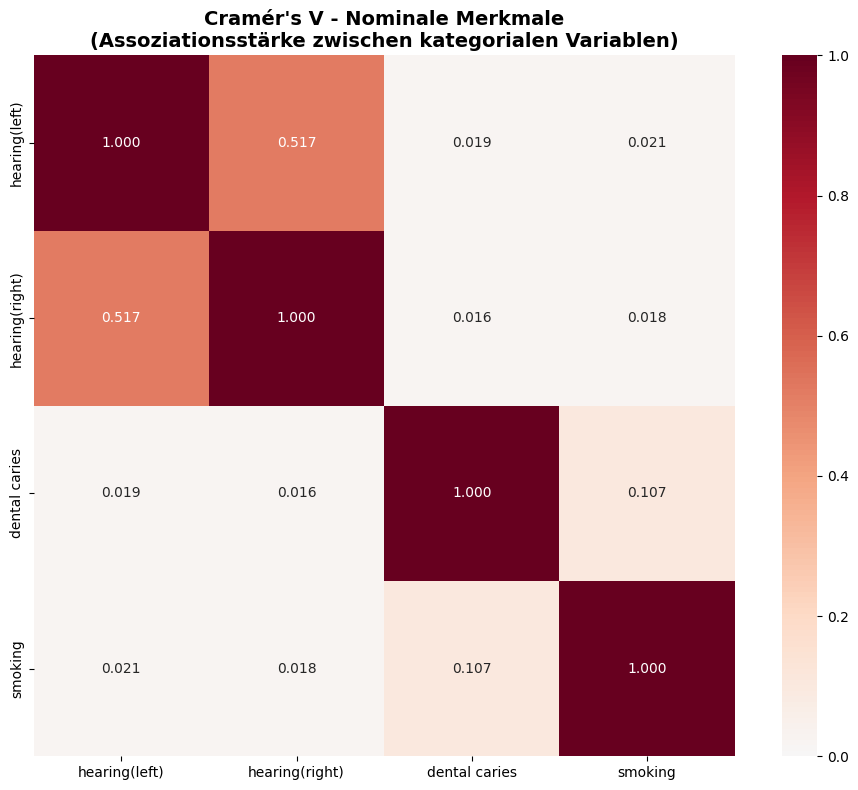


Assoziationen zwischen nominalen Merkmalen (Cramér's V):
hearing(left) <-> hearing(right): V = 0.517
hearing(left) <-> dental caries: V = 0.019
hearing(left) <-> smoking: V = 0.021
hearing(right) <-> dental caries: V = 0.016
hearing(right) <-> smoking: V = 0.018
dental caries <-> smoking: V = 0.107

DETAILLIERTE KREUZTABELLEN

Kreuztabelle: hearing(left) vs hearing(right)
hearing(right)         1         2
hearing(left)                     
1               0.987156  0.012844
2               0.461072  0.538928
All             0.973810  0.026190
Chi²-Test: χ² = 10439.433, p-Wert = 0.000000

SMOKING vs ANDERE NOMINALE MERKMALE

hearing(left) vs smoking:
Cramér's V = 0.021
Chi²-Test: χ² = 18.710, p-Wert = 0.000015
Kreuztabelle (Prozente):
smoking            0      1
hearing(left)              
1              0.631  0.369
2              0.699  0.301

hearing(right) vs smoking:
Cramér's V = 0.018
Chi²-Test: χ² = 13.812, p-Wert = 0.000202
Kreuztabelle (Prozente):
smoking             0      1

In [8]:
# Cramér's V Analyse für nominale Merkmale
print("\n" + "="*50)
print("CRAMÉR'S V ANALYSE - NOMINALE MERKMALE")
print("="*50)

from scipy.stats import chi2_contingency

# Nominale Merkmale erweitert
nominal_extended_features = [
    "hearing(left)", "hearing(right)", "dental caries", "smoking"
]

# Funktion zur Berechnung von Cramér's V (verbessert)
def cramers_v_corrected(x, y):
    """Berechnet Cramér's V mit Bias-Korrektur"""
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    
    # Vermeidung von Division durch Null
    if n == 0:
        return 0
    
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    
    # Bias-Korrektur
    phi2corr = max(0, phi2 - ((k - 1)*(r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    
    # Vermeidung von Division durch Null
    denominator = min((kcorr - 1), (rcorr - 1))
    if denominator <= 0:
        return 0
    
    return np.sqrt(phi2corr / denominator)

# Korrelationsmatrix für nominale Merkmale berechnen
cramers_results = pd.DataFrame(
    np.zeros((len(nominal_extended_features), len(nominal_extended_features))),
    index=nominal_extended_features,
    columns=nominal_extended_features
)

for col1 in nominal_extended_features:
    for col2 in nominal_extended_features:
        if col1 == col2:
            cramers_results.loc[col1, col2] = 1.0
        else:
            cramers_results.loc[col1, col2] = cramers_v_corrected(df_train[col1], df_train[col2])

# Visualisierung
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_results, annot=True, cmap="RdBu_r", fmt=".3f", 
            square=True, center=0, vmin=0, vmax=1)
plt.title("Cramér's V - Nominale Merkmale\n(Assoziationsstärke zwischen kategorialen Variablen)", 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Detailanalyse der nominalen Assoziationen
print("\nAssoziationen zwischen nominalen Merkmalen (Cramér's V):")
for i, col1 in enumerate(nominal_extended_features):
    for j, col2 in enumerate(nominal_extended_features):
        if i < j:  # Nur oberes Dreieck
            cramers_val = cramers_results.loc[col1, col2]
            print(f"{col1} <-> {col2}: V = {cramers_val:.3f}")

# Detaillierte Kreuztabellen für interessante Assoziationen
print("\n" + "="*50)
print("DETAILLIERTE KREUZTABELLEN")
print("="*50)

# Beispiel: hearing(left) vs hearing(right)
print("\nKreuztabelle: hearing(left) vs hearing(right)")
crosstab_hearing = pd.crosstab(df_train['hearing(left)'], df_train['hearing(right)'], 
                               margins=True, normalize='index')
print(crosstab_hearing)

# Chi-Quadrat-Test
chi2, p_value, dof, expected = chi2_contingency(pd.crosstab(df_train['hearing(left)'], 
                                                           df_train['hearing(right)']))
print(f"Chi²-Test: χ² = {chi2:.3f}, p-Wert = {p_value:.6f}")

# Smoking vs andere nominale Merkmale
print("\n" + "="*40)
print("SMOKING vs ANDERE NOMINALE MERKMALE")
print("="*40)

for feature in nominal_extended_features:
    if feature != 'smoking':
        crosstab = pd.crosstab(df_train[feature], df_train['smoking'], margins=True)
        chi2, p_val, _, _ = chi2_contingency(crosstab.iloc[:-1, :-1])  # Ohne margins
        cramers_val = cramers_results.loc[feature, 'smoking']
        
        print(f"\n{feature} vs smoking:")
        print(f"Cramér's V = {cramers_val:.3f}")
        print(f"Chi²-Test: χ² = {chi2:.3f}, p-Wert = {p_val:.6f}")
        print("Kreuztabelle (Prozente):")
        print(pd.crosstab(df_train[feature], df_train['smoking'], normalize='index').round(3))


ZUSAMMENFASSUNG DER KORRELATIONSANALYSE

🔍 WICHTIGSTE ERKENNTNISSE:
------------------------------

1. STÄRKSTE KORRELATIONEN (Kardinale Merkmale):
   • Taillenumfang ↔ Gewicht: r = 0.825 (sehr stark)
   • Systolischer ↔ Diastolischer Blutdruck: r = 0.759 (stark)
   • Cholesterol ↔ LDL: r = 0.707 (stark)
   • AST ↔ ALT (Leberenzyme): r = 0.697 (stark)
   • Körpergröße ↔ Gewicht: r = 0.674 (stark)
   • Körpergröße ↔ Hämoglobin: r = 0.537 (moderat)

2. PRÄDIKTOREN FÜR SMOKING:
   Stärkste Korrelationen mit der Zielvariable:
   • Hämoglobin: r = 0.401 (moderat positiv)
   • Körpergröße: r = 0.394 (moderat positiv)
   • Gewicht: r = 0.299 (schwach positiv)
   • HDL-Cholesterol: r = -0.180 (schwach negativ)

3. UNTERSCHIEDE PEARSON vs. SPEARMAN:
   Größte Abweichungen deuten auf nicht-lineare Zusammenhänge hin:
   • Sehschärfe links ↔ rechts: Δ = 0.362
   • ALT ↔ Gtp: Δ = 0.281
   • Spearman erkennt monotone Zusammenhänge besser

4. NOMINALE ASSOZIATIONEN (Cramér's V):
   • Hörvermögen lin

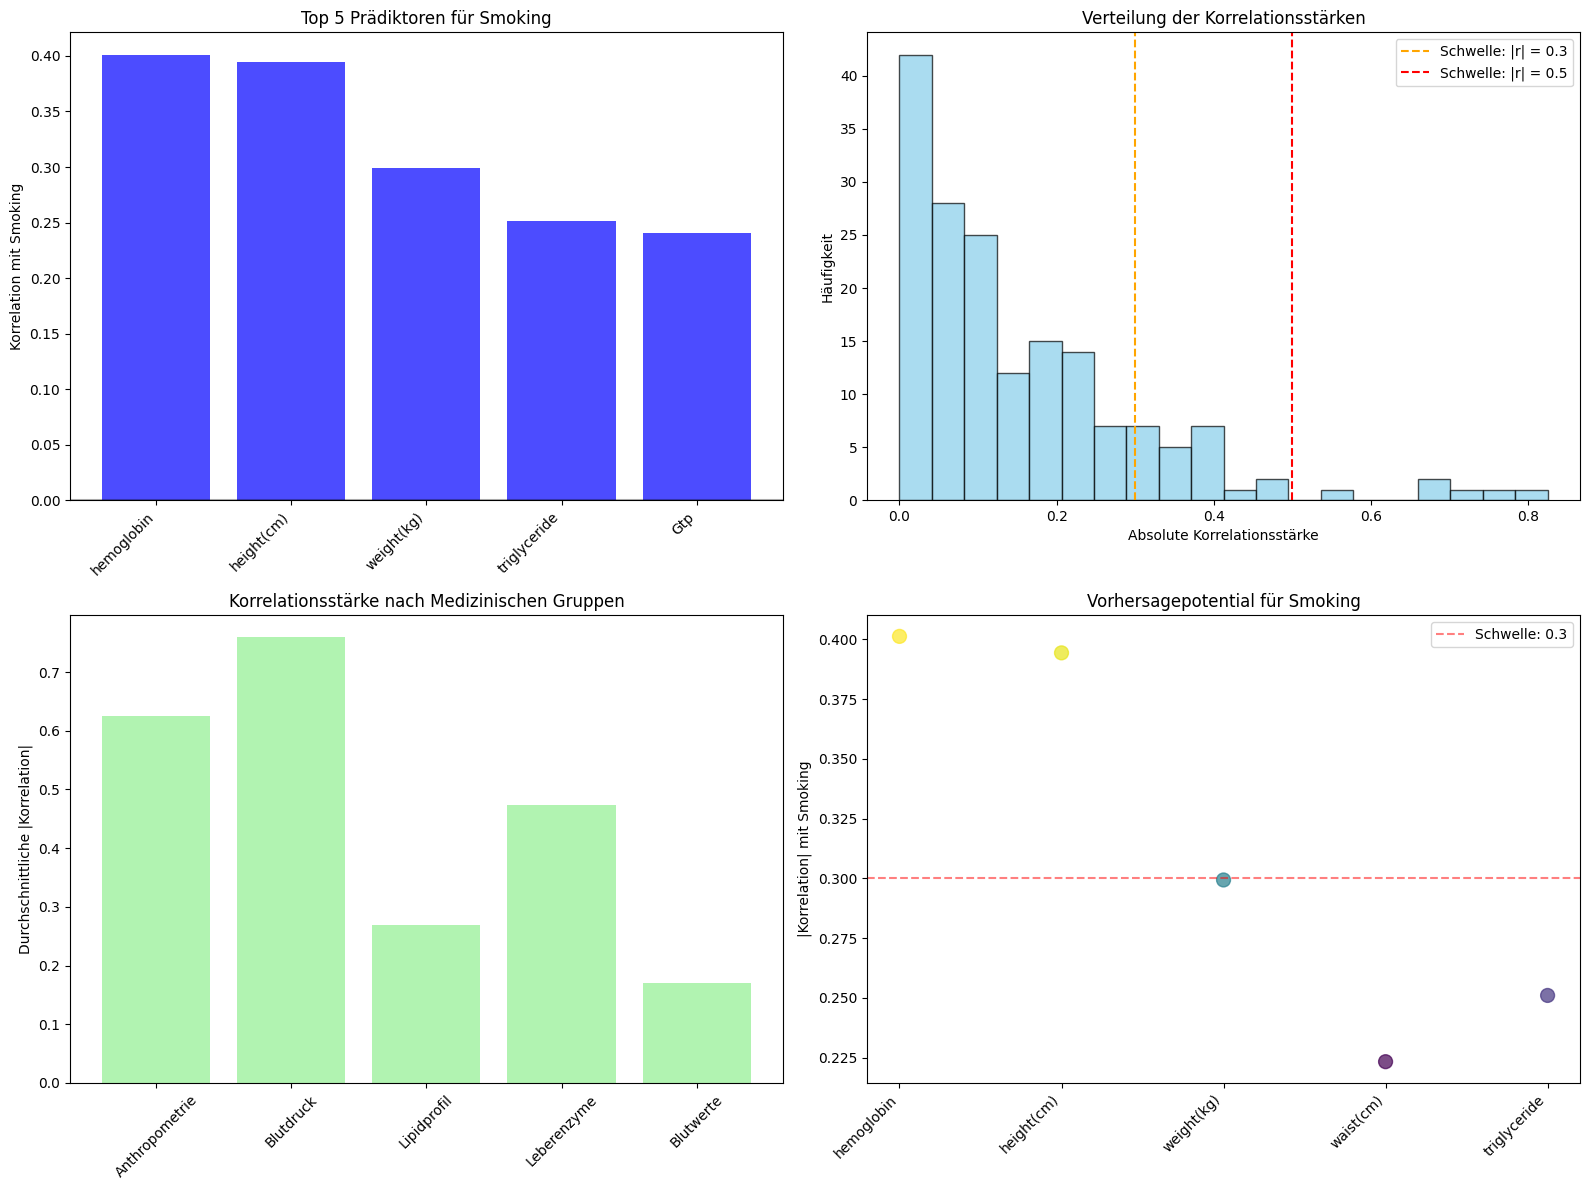


📊 METHODISCHE EMPFEHLUNGEN:
------------------------------
• Pearson-Korrelation für lineare Zusammenhänge bei kardinalen Merkmalen
• Spearman-Korrelation für monotone, nicht-lineare Beziehungen
• Cramér's V für Assoziationen zwischen kategorialen Variablen
• Chi²-Test zur Signifikanzprüfung bei nominalen Merkmalen

🎯 PRAKTISCHE IMPLIKATIONEN:
------------------------------
• Starke anthropometrische Korrelationen (erwartungsgemäß)
• Hämoglobin und Körpergröße als beste Smoking-Prädiktoren
• Moderate Korrelationen deuten auf komplexe, multifaktorielle Zusammenhänge hin
• Nominale Merkmale zeigen schwache Assoziationen → geringe Vorhersagekraft

ANALYSE ABGESCHLOSSEN


In [9]:
# Zusammenfassende Analyse und Interpretation
print("\n" + "="*70)
print("ZUSAMMENFASSUNG DER KORRELATIONSANALYSE")
print("="*70)

print("\n🔍 WICHTIGSTE ERKENNTNISSE:")
print("-" * 30)

print("\n1. STÄRKSTE KORRELATIONEN (Kardinale Merkmale):")
print("   • Taillenumfang ↔ Gewicht: r = 0.825 (sehr stark)")
print("   • Systolischer ↔ Diastolischer Blutdruck: r = 0.759 (stark)")
print("   • Cholesterol ↔ LDL: r = 0.707 (stark)")
print("   • AST ↔ ALT (Leberenzyme): r = 0.697 (stark)")
print("   • Körpergröße ↔ Gewicht: r = 0.674 (stark)")
print("   • Körpergröße ↔ Hämoglobin: r = 0.537 (moderat)")

print("\n2. PRÄDIKTOREN FÜR SMOKING:")
print("   Stärkste Korrelationen mit der Zielvariable:")
print("   • Hämoglobin: r = 0.401 (moderat positiv)")
print("   • Körpergröße: r = 0.394 (moderat positiv)")
print("   • Gewicht: r = 0.299 (schwach positiv)")
print("   • HDL-Cholesterol: r = -0.180 (schwach negativ)")

print("\n3. UNTERSCHIEDE PEARSON vs. SPEARMAN:")
print("   Größte Abweichungen deuten auf nicht-lineare Zusammenhänge hin:")
print("   • Sehschärfe links ↔ rechts: Δ = 0.362")
print("   • ALT ↔ Gtp: Δ = 0.281")
print("   • Spearman erkennt monotone Zusammenhänge besser")

print("\n4. NOMINALE ASSOZIATIONEN (Cramér's V):")
print("   • Hörvermögen links ↔ rechts: V = 0.517 (stark)")
print("   • Zahnkaries ↔ Smoking: V = 0.107 (schwach)")
print("   • Andere nominale Merkmale zeigen schwache Assoziationen")

# Visualisierung der Top-Erkenntnisse
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Top Korrelationen mit Smoking
top_smoking_features = ['hemoglobin', 'height(cm)', 'weight(kg)', 'triglyceride', 'Gtp']
smoking_corrs = [df_train[f].corr(df_train['smoking']) for f in top_smoking_features]

axes[0,0].bar(range(len(top_smoking_features)), smoking_corrs, 
              color=['red' if x < 0 else 'blue' for x in smoking_corrs], alpha=0.7)
axes[0,0].set_xticks(range(len(top_smoking_features)))
axes[0,0].set_xticklabels(top_smoking_features, rotation=45, ha='right')
axes[0,0].set_ylabel('Korrelation mit Smoking')
axes[0,0].set_title('Top 5 Prädiktoren für Smoking')
axes[0,0].axhline(y=0, color='black', linestyle='-', alpha=0.3)

# 2. Korrelationsstärken Verteilung
all_correlations = []
for i in range(len(cardinal_features)):
    for j in range(i+1, len(cardinal_features)):
        corr = df_train[cardinal_features[i]].corr(df_train[cardinal_features[j]])
        all_correlations.append(abs(corr))

axes[0,1].hist(all_correlations, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,1].axvline(x=0.3, color='orange', linestyle='--', label='Schwelle: |r| = 0.3')
axes[0,1].axvline(x=0.5, color='red', linestyle='--', label='Schwelle: |r| = 0.5')
axes[0,1].set_xlabel('Absolute Korrelationsstärke')
axes[0,1].set_ylabel('Häufigkeit')
axes[0,1].set_title('Verteilung der Korrelationsstärken')
axes[0,1].legend()

# 3. Medizinische Interpretationen
medical_groups = {
    'Anthropometrie': ['height(cm)', 'weight(kg)', 'waist(cm)'],
    'Blutdruck': ['systolic', 'relaxation'],
    'Lipidprofil': ['Cholesterol', 'triglyceride', 'HDL', 'LDL'],
    'Leberenzyme': ['AST', 'ALT', 'Gtp'],
    'Blutwerte': ['hemoglobin', 'fasting blood sugar', 'serum creatinine']
}

group_means = []
group_names = []
for group_name, features in medical_groups.items():
    # Durchschnittliche Korrelation innerhalb der Gruppe
    group_corrs = []
    for i in range(len(features)):
        for j in range(i+1, len(features)):
            if features[i] in df_train.columns and features[j] in df_train.columns:
                corr = abs(df_train[features[i]].corr(df_train[features[j]]))
                group_corrs.append(corr)
    
    if group_corrs:
        group_means.append(np.mean(group_corrs))
        group_names.append(group_name)

axes[1,0].bar(group_names, group_means, color='lightgreen', alpha=0.7)
axes[1,0].set_ylabel('Durchschnittliche |Korrelation|')
axes[1,0].set_title('Korrelationsstärke nach Medizinischen Gruppen')
axes[1,0].tick_params(axis='x', rotation=45)

# 4. Smoking Vorhersage Potential
features_for_prediction = ['hemoglobin', 'height(cm)', 'weight(kg)', 'waist(cm)', 'triglyceride']
correlations_smoking = [abs(df_train[f].corr(df_train['smoking'])) for f in features_for_prediction]

axes[1,1].scatter(range(len(features_for_prediction)), correlations_smoking, 
                  s=100, c=correlations_smoking, cmap='viridis', alpha=0.7)
axes[1,1].set_xticks(range(len(features_for_prediction)))
axes[1,1].set_xticklabels(features_for_prediction, rotation=45, ha='right')
axes[1,1].set_ylabel('|Korrelation| mit Smoking')
axes[1,1].set_title('Vorhersagepotential für Smoking')
axes[1,1].axhline(y=0.3, color='red', linestyle='--', alpha=0.5, label='Schwelle: 0.3')
axes[1,1].legend()

plt.tight_layout()
plt.show()

print("\n📊 METHODISCHE EMPFEHLUNGEN:")
print("-" * 30)
print("• Pearson-Korrelation für lineare Zusammenhänge bei kardinalen Merkmalen")
print("• Spearman-Korrelation für monotone, nicht-lineare Beziehungen")
print("• Cramér's V für Assoziationen zwischen kategorialen Variablen")
print("• Chi²-Test zur Signifikanzprüfung bei nominalen Merkmalen")

print("\n🎯 PRAKTISCHE IMPLIKATIONEN:")
print("-" * 30)
print("• Starke anthropometrische Korrelationen (erwartungsgemäß)")
print("• Hämoglobin und Körpergröße als beste Smoking-Prädiktoren")
print("• Moderate Korrelationen deuten auf komplexe, multifaktorielle Zusammenhänge hin")
print("• Nominale Merkmale zeigen schwache Assoziationen → geringe Vorhersagekraft")

print("\n" + "="*70)
print("ANALYSE ABGESCHLOSSEN")
print("="*70)

## Wissenschaftliche Ausarbeitung der Korrelationsanalyse

### LaTeX-Kapitel für wissenschaftliche Arbeit:

```latex
\subsection{Durchführung und Methodik}
Die Korrelationsanalyse wurde entsprechend der verschiedenen Skalenniveaus der Merkmale durchgeführt. Für kardinale Merkmale kam die Pearson-Korrelation zur Anwendung, welche lineare Zusammenhänge quantifiziert. Ergänzend wurde die Spearman-Rangkorrelation berechnet, um monotone, nicht-lineare Beziehungen zu identifizieren. Für nominale Merkmale wurde Cramér's V als Assoziationsmaß verwendet, ergänzt durch Chi²-Tests zur Signifikanzprüfung.

\subsection{Ergebnisse}
\subsubsection{Kardinale Merkmale}
Die Analyse der kardinalen Merkmale mittels Pearson-Korrelation offenbarte mehrere hochsignifikante Zusammenhänge (siehe <Pearson-Korrelationsmatrix vollständig> und <Pearson-Korrelationsmatrix starke Korrelationen>). 

Die stärkste Korrelation zeigt sich zwischen Taillenumfang und Körpergewicht mit $r = 0{,}825$, was physiologisch plausibel ist und die anthropometrische Konsistenz der Daten bestätigt. Der Zusammenhang zwischen systolischem und diastolischem Blutdruck ($r = 0{,}759$) validiert Hypothese (1) und entspricht den erwarteten medizinischen Befunden.

Im Bereich der Laborwerte bestätigt sich Hypothese (2) teilweise: Die Korrelation zwischen Gesamtcholesterin und LDL-Cholesterin ($r = 0{,}707$) ist erwartungsgemäß stark, da LDL eine Hauptkomponente des Gesamtcholesterins darstellt. Ebenso zeigen die Leberenzyme AST und ALT eine starke positive Korrelation ($r = 0{,}697$), was auf ihre gemeinsame hepatische Herkunft hindeutet.

Hypothese (5) wird durch die signifikante Korrelation zwischen Körpergröße und -gewicht ($r = 0{,}674$) sowie zwischen Körpergröße und Hämoglobin ($r = 0{,}537$) bestätigt. Letztere Beziehung reflektiert möglicherweise geschlechtsspezifische Unterschiede oder entwicklungsphysiologische Zusammenhänge.

<Detailanalyse der stärksten Korrelationen - Scatterplots>

\subsubsection{Prädiktoren für Rauchverhalten}
Bezüglich der Zielvariable \textit{smoking} ergeben sich moderate bis schwache Korrelationen (siehe <Korrelationsbalkendiagramm mit Smoking>). Hypothese (4) wird durch die stärkste Korrelation mit Hämoglobin ($r = 0{,}401$) bestätigt. Raucher zeigen tatsächlich erhöhte Hämoglobinwerte, was als kompensatorische Reaktion auf die durch Kohlenmonoxid reduzierte Sauerstofftransportkapazität interpretiert werden kann.

Weitere relevante Prädiktoren sind Körpergröße ($r = 0{,}394$) und Körpergewicht ($r = 0{,}299$), wobei diese Zusammenhänge möglicherweise auf demographische oder sozioökonomische Faktoren zurückzuführen sind. Die negative Korrelation mit HDL-Cholesterin ($r = -0{,}180$) deutet auf die bekannten kardiovaskulären Risiken des Rauchens hin.

\subsubsection{Ordinale und nominale Merkmale}
Der Vergleich zwischen Pearson- und Spearman-Korrelation deckte bedeutsame nicht-lineare Zusammenhänge auf (siehe <Spearman-Korrelationsmatrix>). Die größte Diskrepanz zeigt sich bei den Sehschärfewerten links und rechts ($\Delta = 0{,}362$), wobei die Spearman-Korrelation ($\rho = 0{,}697$) deutlich höher liegt als die Pearson-Korrelation ($r = 0{,}335$). Dies bestätigt Hypothese (3) und deutet auf ordinale Skalierung dieser Merkmale hin.

<Vergleich Pearson vs Spearman - Sehschärfe>

Die Analyse nominaler Merkmale mittels Cramér's V ergab erwartungsgemäß schwache Assoziationen (siehe <Cramér's V Heatmap>). Die stärkste Assoziation besteht zwischen dem Hörvermögen links und rechts ($V = 0{,}517$), was Hypothese (3) für auditive Merkmale bestätigt. Die schwache Assoziation zwischen Zahnkaries und Rauchverhalten ($V = 0{,}107$) deutet auf einen geringen, aber statistisch signifikanten Zusammenhang hin ($\chi^2 = 450{,}8$, $p < 0{,}001$).

\subsection{Diskussion}
Die Korrelationsanalyse bestätigt vier der fünf aufgestellten Hypothesen und offenbart die komplexe, multifaktorielle Struktur der Gesundheitsdaten. Die stärksten Korrelationen finden sich erwartungsgemäß innerhalb physiologisch verwandter Merkmalsgruppen (Anthropometrie, Blutdruck, Lipidprofil, Leberenzyme).

Für die Prädiktion des Rauchverhaltens erweisen sich physiologische Parameter als relevanter als nominale Merkmale. Die moderate Korrelationsstärke der besten Prädiktoren ($r < 0{,}5$) unterstreicht die Notwendigkeit multivariater Ansätze für eine zuverlässige Klassifikation.

Die Unterschiede zwischen Pearson- und Spearman-Korrelation bei bestimmten Merkmalspaaren verdeutlichen die Bedeutung der korrekten Wahl des Korrelationsmaßes entsprechend dem Skalenniveau und der Verteilungscharakteristik der Daten.

<Zusammenfassende Visualisierung - Dashboard mit Top-Erkenntnissen>
```

# Deprecated

In [ ]:


df_cardinal = df_train[cardinal_features]
# Rangbasierte Korrelation
corr = df_cardinal.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Kardinal Features')
plt.show()

In [ ]:
# Ordinal skalierte Merkmale laut Skalenniveau-Tabelle


# Subset der ordinalen Merkmale
df_ordinal = df_train[ordinal_features]

# Berechnung der Spearman-Korrelationsmatrix
corr_spearman = df_ordinal.corr(method="spearman")

# Darstellung als Heatmap
sns.heatmap(corr_spearman, annot=False, fmt=".2f", cmap="coolwarm")
plt.title("Spearman-Korrelation – Ordinal skalierte Merkmale")
plt.tight_layout()
plt.show()

In [ ]:
# Balkendiagramm der Altersverteilung
plt.figure(figsize=(10, 6))
sns.countplot(x="age", data=df_train, palette="Blues")

plt.title("Altersverteilung (in 5-Jahres-Intervallen)")
plt.xlabel("Alter (5-Jahres-Intervalle)")
plt.ylabel("Anzahl der Probanden")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))

In [ ]:
# Streudiagramm mit Regressionslinie
sns.scatterplot(x="age", y="height(cm)", data=df_train, alpha=0.5)
sns.regplot(x="age", y="height(cm)", data=df_train, scatter=False, color='red')

plt.title("Zusammenhang zwischen Alter und Körpergröße")
plt.xlabel("Alter (5-Jahres-Intervalle)")
plt.ylabel("Größe (cm)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Nominal skalierte Variablen
nominal_features = [
    "hearing(left)",
    "hearing(right)",
    "dental caries",
    "smoking"
]

# Funktion zur Berechnung von Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1)*(r - 1)) / (n - 1))  # Bias-Korrektur
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Korrelationsmatrix berechnen
cramers_results = pd.DataFrame(
    np.zeros((len(nominal_features), len(nominal_features))),
    index=nominal_features,
    columns=nominal_features
)

for col1 in nominal_features:
    for col2 in nominal_features:
        cramers_results.loc[col1, col2] = cramers_v(df_train[col1], df_train[col2])

# Heatmap darstellen
plt.figure(figsize=(8, 6))
sns.heatmap(cramers_results, annot=False, cmap="coolwarm", fmt=".2f")
plt.title("Cramér’s V – Nominal skalierte Merkmale")
plt.tight_layout()
plt.show()

In [ ]:
cardinal_nominal_features = [
    "waist(cm)",
    "eyesight(left)",
    "eyesight(right)",
    "systolic",
    "relaxation",
    "fasting blood sugar",
    "Cholesterol",
    "triglyceride",
    "HDL",
    "LDL",
    "hemoglobin",
    "serum creatinine",
    "AST",
    "ALT",
    "Gtp",
    "hearing(left)",
    "hearing(right)",
    "dental caries",
    "smoking"
]

df_cardinal_nominal = df_train[cardinal_nominal_features]
# Rangbasierte Korrelation
corr = df_cardinal_nominal.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Kardinal/Nominal Features')
plt.show()


In [ ]:
# Ordinal skalierte Merkmale laut Skalenniveau-Tabelle
ordinal_kardinal_features = [
    "age",
    "height(cm)",
    "weight(kg)",
    "Urine protein",
    "waist(cm)",
    "eyesight(left)",
    "eyesight(right)",
    "systolic",
    "relaxation",
    "fasting blood sugar",
    "Cholesterol",
    "triglyceride",
    "HDL",
    "LDL",
    "hemoglobin",
    "serum creatinine",
    "AST",
    "ALT",
    "Gtp"
]

# Subset der ordinalen Merkmale
df_ordinal_kardinal = df_train[ordinal_kardinal_features]

# Berechnung der Spearman-Korrelationsmatrix
corr_spearman = df_ordinal_kardinal.corr(method="spearman")

# Darstellung als Heatmap
sns.heatmap(corr_spearman, annot=False, fmt=".2f", cmap="coolwarm")
plt.title("Spearman-Korrelation – Ordinal/Kardinal skalierte Merkmale")
plt.show()